In [1]:
from pygeoinf.interval.interval_domain import IntervalDomain
from pygeoinf.interval.function_providers import BumpFunctionProvider
from pygeoinf.interval.functions import Function
from pygeoinf.interval.l2_space import L2Space
import numpy as np
import matplotlib.pyplot as plt


In [29]:
DOMAIN = IntervalDomain(0, 1)
N = 1 # does not matter
M = L2Space(N, DOMAIN, basis_type='none')
function_provider = BumpFunctionProvider(M)
parameters = {'width': 0.2, 'center': 0.5, 'default_k': 1}
f = function_provider.get_function_by_parameters(parameters)

<Axes: title={'center': 'Function on [0.0, 1.0]'}, xlabel='x', ylabel='f(x)'>

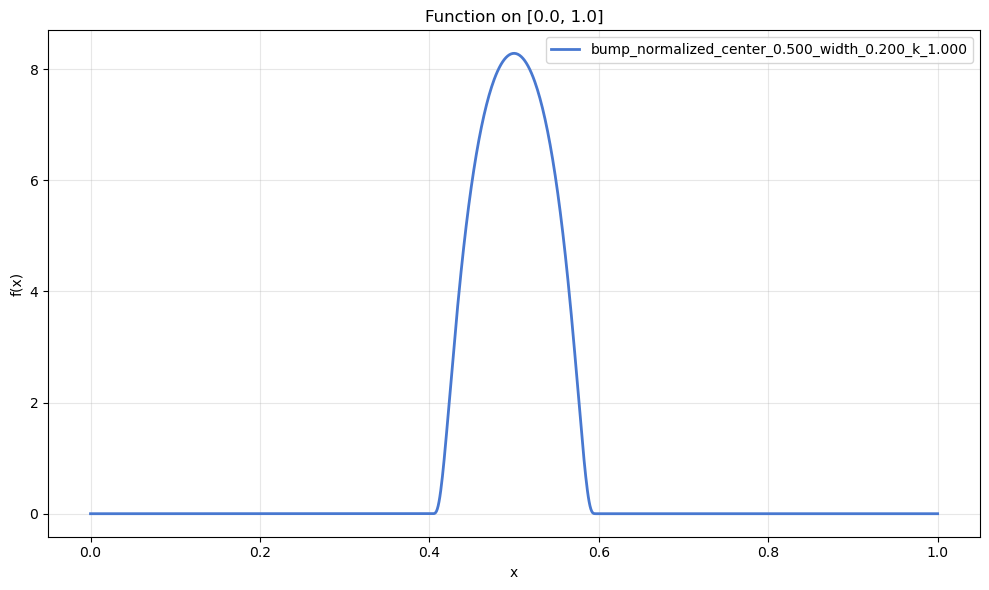

In [32]:
f.plot()

In [22]:
method = 'simpson'
n_points_list = np.logspace(1, 4, 5)
vectorized = True
n_tries = 3
results = np.asarray([])
results_std = np.asarray([])

for n_points in n_points_list:
    partial_results = np.asarray([])
    for i in range(n_tries):
        result = f.integrate(method=method, n_points=int(n_points), vectorized=vectorized)
        partial_results = np.append(partial_results, result)
    results = np.append(results, np.mean(partial_results))
    results_std = np.append(results_std, np.std(partial_results))

In [23]:
print(results)
print(results_std)

[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
[5.55111512e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


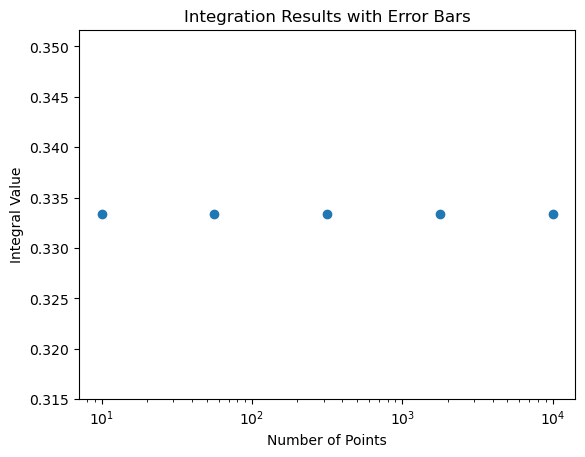

In [24]:
plt.errorbar(n_points_list, results, yerr=results_std, fmt='o')
plt.xscale('log')
plt.xlabel('Number of Points')
plt.ylabel('Integral Value')
plt.title('Integration Results with Error Bars')
plt.show()